In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from scipy import stats
from utils.notebook_config import *
import random
from utils.simulation import *

%matplotlib inline
from IPython.display import HTML

In [2]:
#Work here with the defined classes in simulation2.py

n = 5

p1, m_on, m_off = 0.05, 0.05, 0.05

# gene1 = gene(3, boxes, p1, p2)
# gene2 = gene(3, boxes, p1, p2)

steps = 100

shots = 2000

simu = simulation(timesteps=steps)

avg1, std1, avg2, std2, corr, corrx, corrx1, corrx2, corrx3 = simu.average(n, p1, m_on, m_off, shots, m_switch=True, tf_switch=True)
#avg1m, std1m, avg2m, std2m, corrm, corrxm = simu.average(n, p1, m_on, m_off, shots, m_switch=True, tf_switch=True)

/opt/anaconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2999: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:3000: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [106]:
#mod_corrx, mod_corrxm = corrx.T, corrxm.T

mod_corrx, mod_corrx1, mod_corrx2, mod_corrx3  = corrx.T, corrx1.T, corrx2.T, corrx3.T

print(np.shape(mod_corrx))  #          #timewindows x #shots
print(np.shape(mod_corrx1))
print(np.shape(mod_corrx2))
print(np.shape(mod_corrx3))

(866, 2000)
(822, 2000)
(733, 2000)
(555, 2000)


In [74]:
print("t_eq = ", (steps-np.shape(mod_corrx1)[0])/2)

t_eq =  89.0


Mean + std.:  -0.03931333833466563  +-  0.38815208031743426
Mean + std.:  -0.07250561747866553  +-  0.33234524677058724
Mean + std.:  -0.09299548415794544  +-  0.26951816252324834
Mean + std.:  -0.10869962998710779  +-  0.20391666859910912
-0.0783785174895961


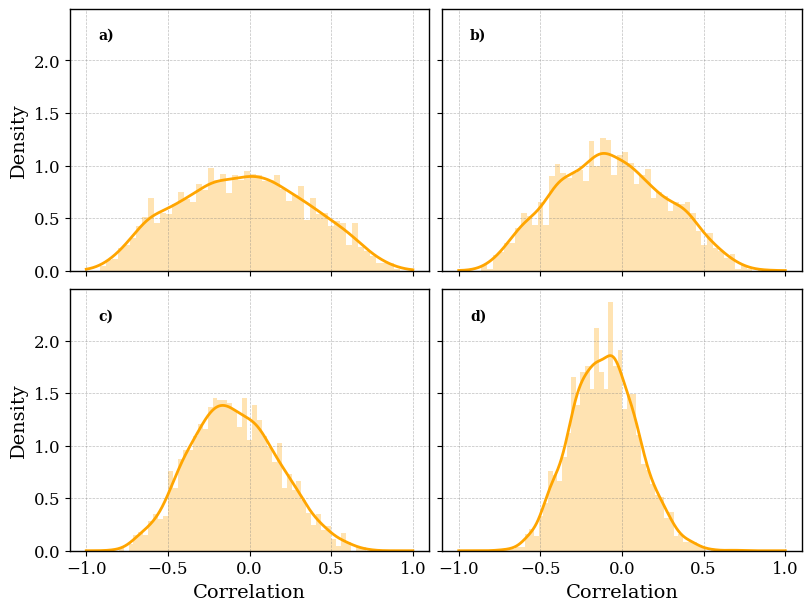

In [90]:
time = 00

corr0 = mod_corrx[:][time]
corr1 = mod_corrx1[:][time]
corr2 = mod_corrx2[:][time]
corr3 = mod_corrx3[:][time]


hmm_corr0 = [i for i in corr0 if np.abs(i)>0]
hmm_corr1 = [i for i in corr1 if np.abs(i)>0]
hmm_corr2 = [i for i in corr2 if np.abs(i)>0]
hmm_corr3 = [i for i in corr3 if np.abs(i)>0]

m0, stdd0 = np.mean(hmm_corr0), np.std(hmm_corr0)
print("Mean + std.: ", m0, " +- ", stdd0)
m1, stdd1 = np.mean(hmm_corr1), np.std(hmm_corr1)
print("Mean + std.: ", m1, " +- ", stdd1)
m2, stdd2 = np.mean(hmm_corr2), np.std(hmm_corr2)
print("Mean + std.: ", m2, " +- ", stdd2)
m3, stdd3 = np.mean(hmm_corr3), np.std(hmm_corr3)
print("Mean + std.: ", m3, " +- ", stdd3)

print((m0+m1+m2+m3)/4)

kde0 = stats.gaussian_kde(hmm_corr0)
kde1 = stats.gaussian_kde(hmm_corr1)
kde2 = stats.gaussian_kde(hmm_corr2)
kde3 = stats.gaussian_kde(hmm_corr3)

xx = np.linspace(-1,1, 1000)
fig, axs = plt.subplots(2,2,figsize=(8,6), sharey=True, sharex=True)

ax0 = axs[0, 0]
ax1 = axs[0, 1]
ax2 = axs[1, 0]
ax3 = axs[1, 1]

ax0.hist(hmm_corr0, density=True, bins=50, alpha=0.3, color="orange")
ax0.plot(xx, kde0(xx), label="static meth", color="orange")
ax0.text(0.1,0.9,"a)",fontweight="bold", horizontalalignment='center', verticalalignment='center', transform = ax0.transAxes)
ax1.hist(hmm_corr1, density=True, bins=50, alpha=0.3, color="orange")
ax1.plot(xx, kde1(xx), label="static meth", color="orange")
ax1.text(0.1,0.9,"b)",fontweight="bold", horizontalalignment='center', verticalalignment='center', transform = ax1.transAxes)
ax2.hist(hmm_corr2, density=True, bins=50, alpha=0.3, color="orange")
ax2.plot(xx, kde2(xx), label="static meth", color="orange")
ax2.text(0.1,0.9,"c)",fontweight="bold", horizontalalignment='center', verticalalignment='center', transform = ax2.transAxes)
ax3.hist(hmm_corr3, density=True, bins=50, alpha=0.3, color="orange")
ax3.plot(xx, kde3(xx), label="static meth", color="orange")
ax3.text(0.1,0.9,"d)",fontweight="bold", horizontalalignment='center', verticalalignment='center', transform = ax3.transAxes)

# kwargs0 = {"ha":"left", "va":"top", "transform":ax0.transAxes, "fontsize":15, "fontweight":"bold"}

# ax.text(0.01, 0.99, r"Mean + std. (static): {} $\pm$ {}".format(round(m1,4), round(stdd1,4)), kwargs)
# ax.text(0.01, 0.93, r"Mean + std. (dyn): {} $\pm$ {}".format(round(m2,4), round(stdd2,4)), kwargs)

# ax.hist(hmm_corr1+hmm_corrm1, density=True, bins=50, alpha=0.3, color="red")
# ax.plot(xx, (kde(xx)+kde_m(xx))/2, label="all", color="red")

#ax0.legend(prop={'weight': "bold"})
#plt.suptitle("Corr. dist. of RNA production at timestep {} after equil.".format(time))
ax2.set_xlabel("Correlation"), ax3.set_xlabel("Correlation")
ax0.set_ylabel("Density"), ax2.set_ylabel("Density")
#plt.savefig("figuress/fig6.png", dpi=300)
plt.show()

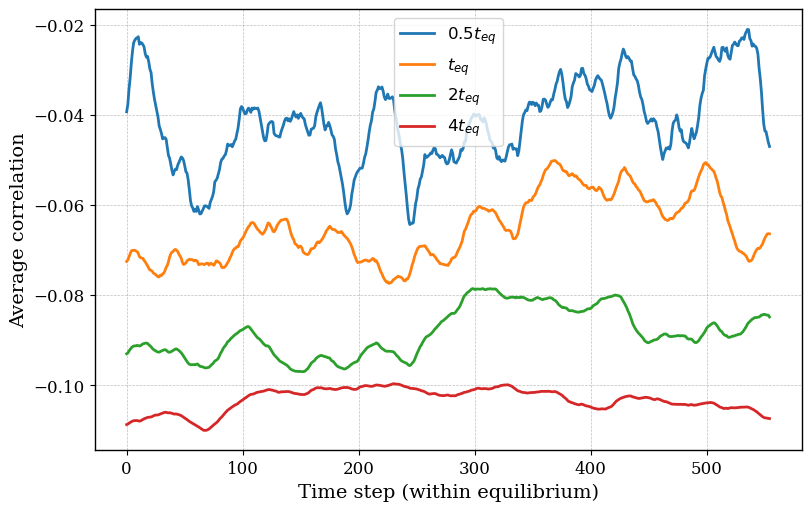

In [102]:
time = [i for i in range(np.shape(mod_corrx3)[0])]

y0, y1, y2, y3 = [], [], [], []

for j in time:
    corr0 = mod_corrx[:][j]
    corr1 = mod_corrx1[:][j]
    corr2 = mod_corrx2[:][j]
    corr3 = mod_corrx3[:][j]
    hmm_corr0 = [i for i in corr0 if np.abs(i)>0]
    hmm_corr1 = [i for i in corr1 if np.abs(i)>0]
    hmm_corr2 = [i for i in corr2 if np.abs(i)>0]
    hmm_corr3 = [i for i in corr3 if np.abs(i)>0]

    y0.append(np.mean(hmm_corr0)), y1.append(np.mean(hmm_corr1))
    y2.append(np.mean(hmm_corr2)), y3.append(np.mean(hmm_corr3))

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(time, y0, label=r"$0.5t_{eq}$")
ax.plot(time, y1, label=r"$t_{eq}$")
ax.plot(time, y2, label=r"$2t_{eq}$")
ax.plot(time, y3, label=r"$4t_{eq}$")

ax.set_xlabel("Time step (within equilibrium)")
ax.set_ylabel("Average correlation")

plt.legend()
#plt.savefig("figuress/fig7.png", dpi=300)
plt.show()

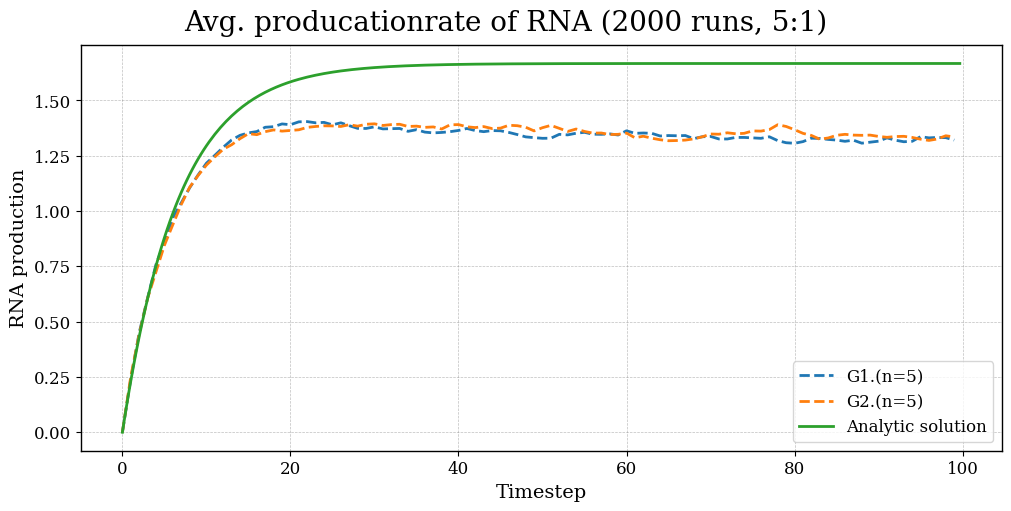

In [3]:
def analytic(length: int, p_on:float, p_off: float, timesteps: int):
    x = [i/3 for i in range(3*timesteps)]
    y = []
    for i in x:
        solution = length*(p_on/(p_on+p_off))*(1-np.exp(-(p_off+p_on)*i))
        y.append(solution)

    return x,y

def analytic_meth(length: int, p_on:float, p_off: float, m_on: float, m_off: float, timesteps: int):        #constant methylation rate!
    x = [i/3 for i in range(3*timesteps)]
    y = []
    k, m = p_on+p_off, m_on+m_off

    a = p_on*(m-m_on)
    b = -k*m + m_on*p_on
    c = m + k
    g_1, g_2 = (-c+np.sqrt(c**2+4*b))/2, (-c-np.sqrt(c**2+4*b))/2
    c_1 = ((g_2*a - p_on*b)/(b*(g_2-g_1)))
    for i in x:
        theta = c_1*np.exp(g_1*i) + (a/b - c_1)*np.exp(g_2*i) - a/b
        solution = length*theta
        y.append(solution)
    return x,y

time = simu.timeline

x,y = analytic_meth(n, p_on=p1, p_off=p1, m_on=m_on, m_off=m_off, timesteps = steps)

fig, ax = plt.subplots(figsize=(10,5))

ax.plot(time, avg1, label="G1.(n={})".format(n), linestyle="--")
ax.plot(time, avg2, label="G2.(n={})".format(n), linestyle="--")

ax.plot(x,y, label="Analytic solution")

ax.set_xlabel("Timestep")
ax.set_ylabel("RNA production")

ax.legend()
# ax1.set_title("Avg. producationrate of protein (1000 shots)")
# ax2.set_title("Avg. producationrate of protein (1000 shots)")
plt.suptitle("Avg. producationrate of RNA ({} runs, 5:1)".format(shots), fontsize=20)
#plt.savefig("figures/corr3.png", dpi = 300)
plt.show()

In [46]:
#Check for nan, no nan ==> notnice = 0

notnice = 0

nice = 0

for i in mod_corrx.flatten():
    if i == 100:
        notnice += 1
    else:
        nice += 1

print(notnice)

print(nice)

0
0


In [47]:
avg_corr = 0
for i in range(np.shape(mod_corrx)[0]):
    corr1 = mod_corrx[:][i]
    corrm1 = mod_corrxm[:][i]
    corr1 = [i for i in corr1 if i != 100]
    corrm1 = [i for i in corrm1 if i != 100]

    hmm_corr1 = [i for i in corr1 if np.abs(i)>0]
    hmm_corrm1 = [i for i in corrm1 if np.abs(i)>0]

    avg_corr += np.mean(hmm_corr1+hmm_corrm1)
avg_corr = avg_corr/np.shape(mod_corrx)[0]

print(avg_corr)

ZeroDivisionError: division by zero

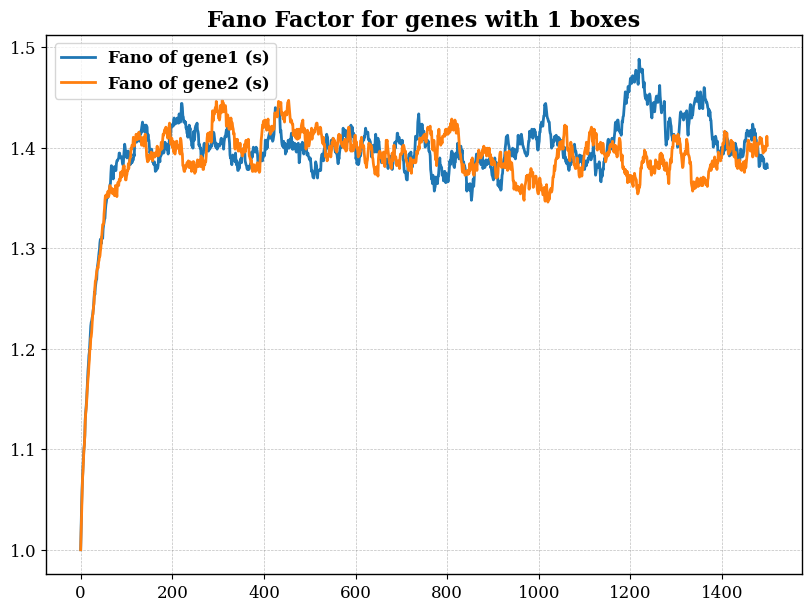

In [54]:
fano1, fano2, fano1_m, fano2_m = [], [], [], []

for i, val in enumerate(avg1):
    if i == 0:
        fano1.append(1)
        fano1_m.append(1)
        fano2.append(1)
        fano2_m.append(1)
    else: 
        fano1.append(val/(std1[i]**2))
        #fano1_m.append(avg1m[i]/(std1m[i]**2))
        fano2.append(avg2[i]/(std2[i]**2))
        #fano2_m.append(avg2m[i]/(std2m[i]**2))

time = simu.timeline


fig, ax = plt.subplots(figsize=(8,6))
ax.plot(time, fano1, label="Fano of gene1 (s)")
ax.plot(time, fano2, label="Fano of gene2 (s)")
#ax.plot(time, fano1_m, label="Fano of gene1 (d)")
#ax.plot(time, fano2_m, label="Fano of gene2 (d)")
plt.legend(prop={'weight': "bold"})
plt.title("Fano Factor for genes with {} boxes".format(n), fontweight="bold")
#plt.savefig("figures/fano4.png", dpi=300)
plt.show()

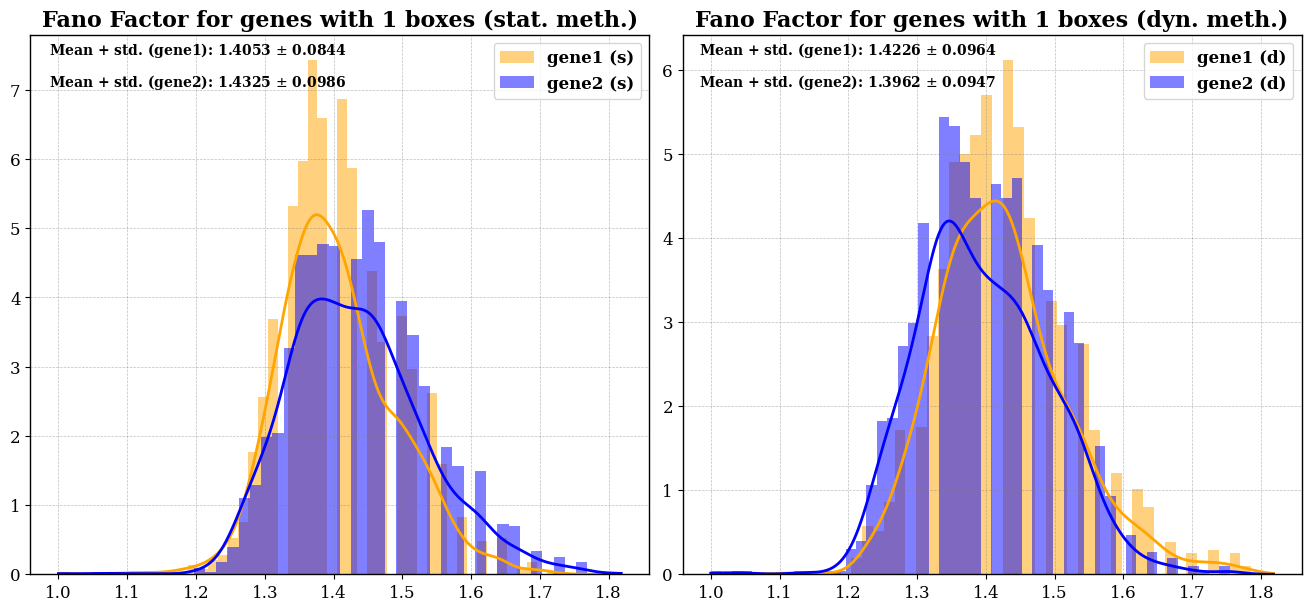

In [ ]:
kde1, kde2 = stats.gaussian_kde(fano1), stats.gaussian_kde(fano2)

kde1m, kde2m = stats.gaussian_kde(fano1_m), stats.gaussian_kde(fano2_m)

m1, stdd1 = np.mean(fano1), np.std(fano1)
m2, stdd2 = np.mean(fano2), np.std(fano2)

mm1, stddm1 = np.mean(fano1_m), np.std(fano1_m)
mm2, stddm2 = np.mean(fano2_m), np.std(fano2_m)

xx = np.linspace(min(fano1+fano2+fano1_m+fano2_m), max(fano1+fano2+fano1_m+fano2_m), 1000)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(13,6))
ax1.hist(fano1, bins=50, density=True, label="gene1 (s)", alpha=0.5, color="orange")
ax1.hist(fano2, bins=50, density=True, label="gene2 (s)", alpha=0.5, color="blue")
ax1.plot(xx, kde1(xx), color="orange")
ax1.plot(xx, kde2(xx), color="blue")
ax1.legend(prop={'weight': "bold"})


ax2.hist(fano1_m, bins=50, density=True, label="gene1 (d)", alpha=0.5, color="orange")
ax2.hist(fano2_m, bins=50, density=True, label="gene2 (d)", alpha=0.5, color="blue")
ax2.plot(xx, kde1m(xx), color="orange")
ax2.plot(xx, kde2m(xx), color="blue")
ax2.legend(prop={'weight': "bold"})

kwargs = {"ha":"left", "va":"top", "transform":ax1.transAxes, "fontsize":10, "fontweight":"bold"}

ax1.text(0.03, 0.99, r"Mean + std. (gene1): {} $\pm$ {}".format(round(m1,4), round(stdd1,4)), kwargs)
ax1.text(0.03, 0.93, r"Mean + std. (gene2): {} $\pm$ {}".format(round(m2,4), round(stdd2,4)), kwargs)

ax2.text(1.08, 0.99, r"Mean + std. (gene1): {} $\pm$ {}".format(round(mm1,4), round(stddm1,4)), kwargs)
ax2.text(1.08, 0.93, r"Mean + std. (gene2): {} $\pm$ {}".format(round(mm2,4), round(stddm2,4)), kwargs)

ax1.set_title("Fano Factor for genes with {} boxes (stat. meth.)".format(n), fontweight="bold")
ax2.set_title("Fano Factor for genes with {} boxes (dyn. meth.)".format(n), fontweight="bold")
plt.legend(prop={'weight': "bold"})
#plt.savefig("figures/fano5.png", dpi=300)
plt.show()

In [48]:
mod_corrx, mod_corrxm = corrx.T, corrxm.T

time = 0

corr1 = mod_corrx[:][time]
corrm1 = mod_corrxm[:][time]

hmm_corr1 = [i for i in corr1 if np.abs(i)>0]
hmm_corrm1 = [i for i in corrm1 if np.abs(i)>0]

m1, stdd1 = np.mean(hmm_corr1), np.std(hmm_corr1)
print("Mean + std. (static): ", m1, " +- ", stdd1)

m2, stdd2 = np.mean(hmm_corrm1), np.std(hmm_corrm1)
print("Mean + std. (dyn.): ", m2, " +- ", stdd2)

kde = stats.gaussian_kde(hmm_corr1)

kde_m = stats.gaussian_kde(hmm_corrm1)

xx = np.linspace(-1,1, 1000)
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(hmm_corr1, density=True, bins=50, alpha=0.3, color="orange")
ax.hist(hmm_corrm1, density=True, bins=50, alpha=0.3, color="blue")
ax.plot(xx, kde(xx), label="static meth", color="orange")
ax.plot(xx, kde_m(xx), label="dyn. meth.", color="blue")

kwargs = {"ha":"left", "va":"top", "transform":ax.transAxes, "fontsize":15, "fontweight":"bold"}

ax.text(0.01, 0.99, r"Mean + std. (static): {} $\pm$ {}".format(round(m1,4), round(stdd1,4)), kwargs)
ax.text(0.01, 0.93, r"Mean + std. (dyn): {} $\pm$ {}".format(round(m2,4), round(stdd2,4)), kwargs)

# ax.hist(hmm_corr1+hmm_corrm1, density=True, bins=50, alpha=0.3, color="red")
# ax.plot(xx, (kde(xx)+kde_m(xx))/2, label="all", color="red")

plt.legend(prop={'weight': "bold"})
plt.title("Corr. dist. of RNA production at timestep {} after equil.".format(time))
#plt.savefig("figures/corr19.png", dpi=300)
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [32]:
# from matplotlib.animation import FuncAnimation
# import matplotlib as mpl
# from scipy.stats import gaussian_kde

# mpl.rcParams['animation.embed_limit'] = 100

# # --- Example data ---
# #frames = np.shape(mod_corrx)[0]
# frames = 400
# data1 = mod_corrx#[:][time]
# data2 = mod_corrxm#[:][time]

# # --- Setup plot ---
# fig, ax = plt.subplots(figsize=(6,4), dpi=100)
# bins = np.linspace(-1.1, 1.1, 50)

# # Initial histograms
# counts1, _ = np.histogram(data1[:][0], bins=bins)
# counts2, _ = np.histogram(data2[:][0], bins=bins)

# width = (bins[1] - bins[0]) * 0.4  # bar width

# # Bars for histogram 1 and 2 (slightly shifted)
# bars1 = ax.bar(bins[:-1] - width/2, counts1, width=width, 
#                color='steelblue', alpha=0.5, label='Stat. meth')
# bars2 = ax.bar(bins[:-1] + width/2, counts2, width=width, 
#                color='salmon', alpha=0.5, label="Dyn. meth.")

# # Initial KDE curves
# x_vals = np.linspace(bins[0], bins[-1], 300)
# kde1 = gaussian_kde(data1[0])
# kde2 = gaussian_kde(data2[0])
# line1, = ax.plot(x_vals, kde1(x_vals) * len(data1[0]) * (bins[1]-bins[0]), 
#                  color='blue', lw=2)
# line2, = ax.plot(x_vals, kde2(x_vals) * len(data2[0]) * (bins[1]-bins[0]), 
#                  color='red', lw=2)

# ax.set_xlim(bins[0], bins[-1])
# ax.set_ylim(0, max(counts1.max(), counts2.max()) * 1.2)
# kwargs = {"ha":"left", "va":"top", "transform":ax.transAxes, "fontsize":15, "fontweight":"bold"}
# ax.text(0.01, 0.99, r"n={}, $k(on), k(off) = ${}, $m(on), m(off) = ${}".format(n, p1, m_on), kwargs)
# ax.legend()
# ax.set_title("Frame 0")

# # --- Animation update function ---
# def update(frame):
#     counts1, _ = np.histogram(data1[:][5*frame], bins=bins)
#     counts2, _ = np.histogram(data2[:][5*frame], bins=bins)
    
#     for rect, h in zip(bars1, counts1):
#         rect.set_height(h)
#     for rect, h in zip(bars2, counts2):
#         rect.set_height(h)

#     # Update KDE curves
#     kde1 = gaussian_kde(data1[frame])
#     kde2 = gaussian_kde(data2[frame])
#     line1.set_ydata(kde1(x_vals) * len(data1[frame]) * (bins[1]-bins[0]))
#     line2.set_ydata(kde2(x_vals) * len(data2[frame]) * (bins[1]-bins[0]))
    
#     ax.set_title(f"Time step {5*frame} after equlibrium")
#     return [*bars1, *bars2]

# # --- Create animation ---
# ani = FuncAnimation(fig, update, frames=frames, blit=False, repeat=False)

# # --- Show inline in Jupyter ---
# #HTML(ani.to_jshtml(fps=20))

# from matplotlib.animation import FFMpegWriter

# # Configure ffmpeg writer
# writer = FFMpegWriter(
#     fps=30,
#     codec="h264",
#     bitrate=-1,  # let ffmpeg choose
#     extra_args=["-crf", "26", "-preset", "slow"]
# )

# # Save with the writer
# ani.save("corr_hist3.mp4", writer=writer, dpi=100)

/var/folders/rq/sf33k5wx73bcj8m51c786sc80000gn/T/ipykernel_84180/1289194301.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(6,4), dpi=100)


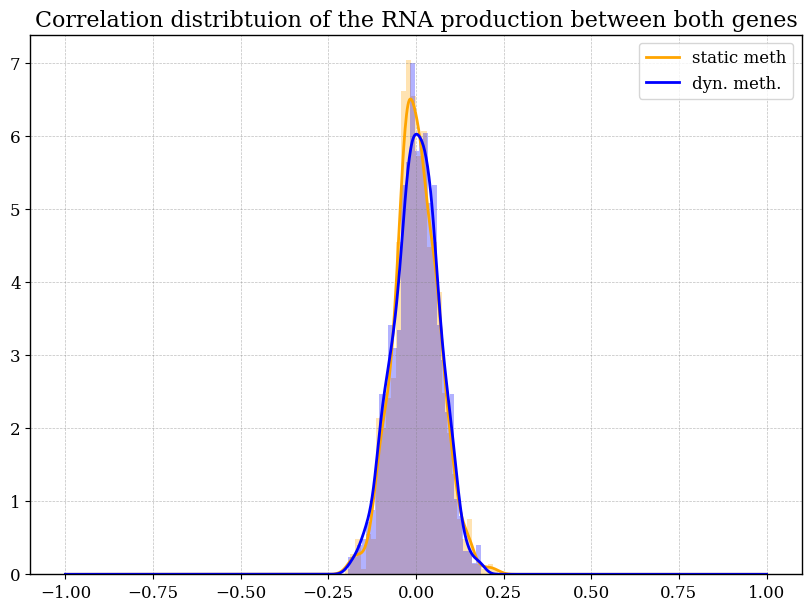

In [9]:
corrm1 = [i for i in corrm if i != 0]

corr1 = [i for i in corr if i != 0]

kde = stats.gaussian_kde(corr1)

kde_m = stats.gaussian_kde(corrm1)

xx = np.linspace(-1,1, 1000)
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(corr1, density=True, bins=30, alpha=0.3, color="orange")
ax.hist(corrm1, density=True, bins=30, alpha=0.3, color="blue")
ax.plot(xx, kde(xx), label="static meth", color="orange")
ax.plot(xx, kde_m(xx), label="dyn. meth.", color="blue")
plt.legend()
plt.title("Correlation distribtuion of the RNA production between both genes")
#plt.savefig("figures/corr1.png", dpi=300)
plt.show()

In [127]:
n = 1

p1, m_on, m_off = 0.1, 0.2, 0.2

# gene1 = gene(3, boxes, p1, p2)
# gene2 = gene(3, boxes, p1, p2)

steps = 100

shots = 5000

simu = simulation(timesteps=steps)

avg1, std1, avg2, std2, corr, corrx = simu.average(n, p1, m_on, m_off, shots, m_switch=False, tf_switch=False)

p1, m_on, m_off = 0.2, 0.1, 0.1
avg1m, std1m, avg2m, std2m, corrm, corrmx = simu.average(n, p1, m_on, m_off, shots, m_switch=False, tf_switch=False)

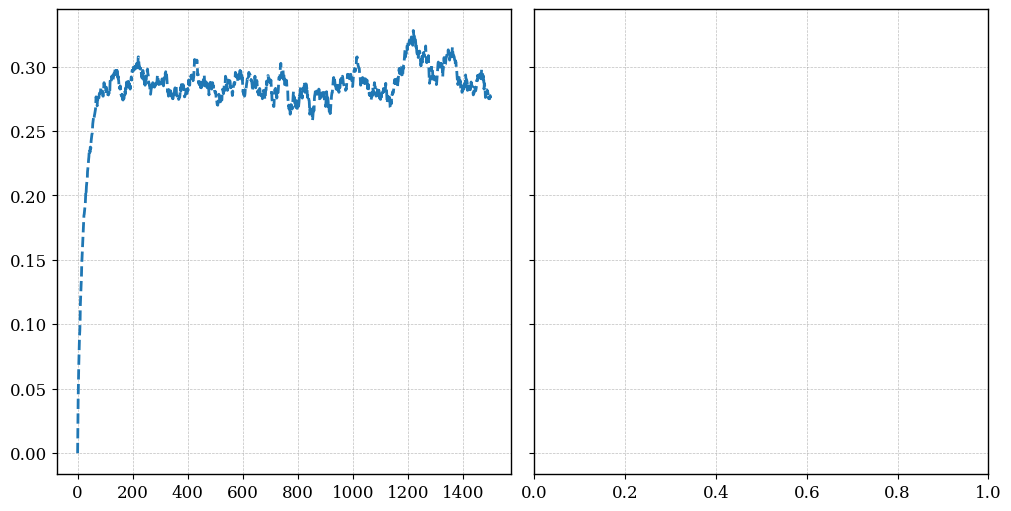

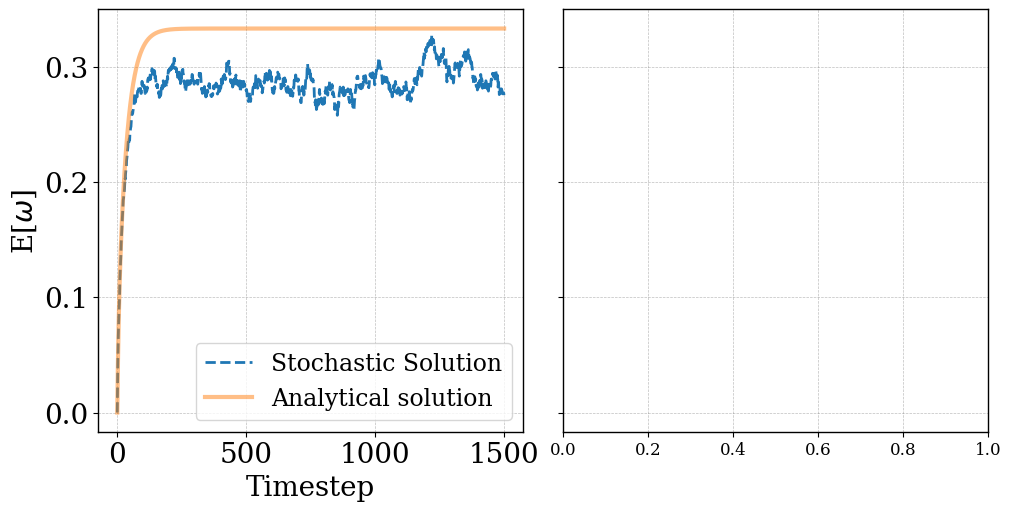

In [56]:
def analytic(length: int, p_on:float, p_off: float, timesteps: int):
    x = [i/3 for i in range(3*timesteps)]
    y = []
    for i in x:
        solution = length*(p_on/(p_on+p_off))*(1-np.exp(-(p_off+p_on)*i))
        y.append(solution)

    return x,y

def analytic_meth(length: int, p_on:float, p_off: float, m_on: float, m_off: float, timesteps: int):        #constant methylation rate!
    x = [i/3 for i in range(3*timesteps)]
    y = []
    k, m = p_on+p_off, m_on+m_off

    a = p_on*(m-m_on)
    b = -k*m + m_on*p_on
    c = m + k
    g_1, g_2 = (-c+np.sqrt(c**2+4*b))/2, (-c-np.sqrt(c**2+4*b))/2
    c_1 = ((g_2*a - p_on*b)/(b*(g_2-g_1)))
    for i in x:
        theta = c_1*np.exp(g_1*i) + (a/b - c_1)*np.exp(g_2*i) - a/b
        solution = length*theta
        y.append(solution)
    return x,y

time = simu.timeline

x,y = analytic_meth(n, p_on=p1, p_off=p1, m_on=m_on, m_off=m_off, timesteps = steps)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5),sharey=True)

# ax1.plot(time, avg1, label="G1.(n={})".format(n), linestyle="--")
# ax1.plot(time, avg2, label="G2.(n={})".format(n), linestyle="--")

ax1.plot(time, avg1, label="Stochastic Solution".format(n), linestyle="--", linewidth=2)
#ax1.plot(time, avg2, label="Gene 2".format(n), linestyle="--")

#ax2.plot(time, avg1m, label="Stochastic Solution".format(n), linestyle="--")
# ax1.plot(time, avg2m, label="G2.(n={}), dyn. meth.".format(n), linestyle="--")

ax1.plot(x,y, label="Analytical solution",linewidth=3, alpha=0.5)
##ax2.plot(x,y, label="Analytical solution",linewidth=3, alpha=0.5)

ax1.set_xlabel("Timestep", fontsize=20)
ax1.set_ylabel(r"E[$\omega$]", fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=20)
ax1.tick_params(axis='both', which='minor', labelsize=20)

#ax2.set_xlabel("Timestep", fontsize=20)
#ax2.set_ylabel(r"E[$\omega$]", fontsize=20)
#ax2.tick_params(axis='both', which='major', labelsize=20)
#ax2.tick_params(axis='both', which='minor', labelsize=20)
#plt.suptitle("Avg. producationrate of RNA ({} runs)".format(shots), fontsize=20)
ax1.legend(fontsize=17)
#ax2.legend(fontsize=17)
#plt.savefig("figuress/fig2.png", dpi = 300)
plt.show()

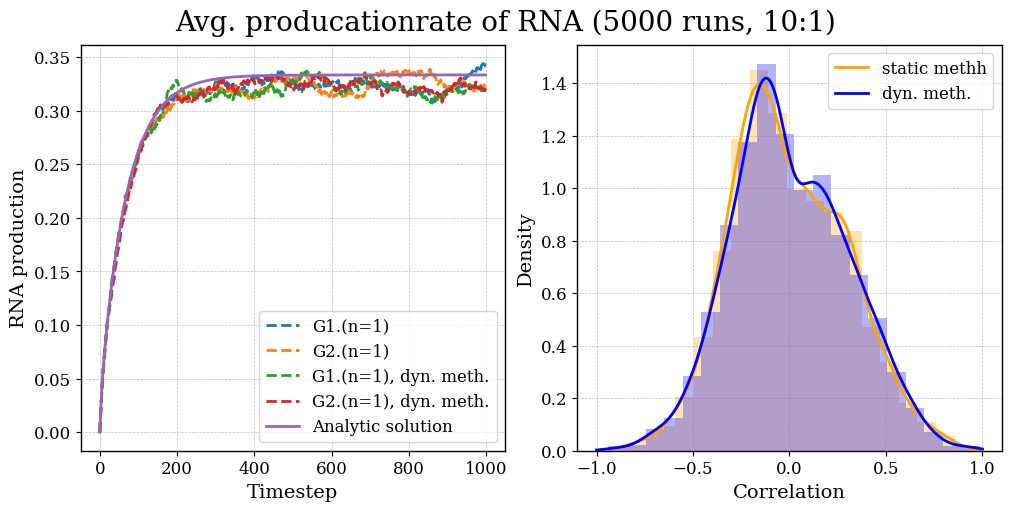

In [43]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

ax1.plot(time, avg1, label="G1.(n={})".format(n), linestyle="--")
ax1.plot(time, avg2, label="G2.(n={})".format(n), linestyle="--")

ax1.plot(time, avg1m, label="G1.(n={}), dyn. meth.".format(n), linestyle="--")
ax1.plot(time, avg2m, label="G2.(n={}), dyn. meth.".format(n), linestyle="--")

ax1.plot(x,y, label="Analytic solution")

ax1.set_xlabel("Timestep")
ax1.set_ylabel("RNA production")

ax1.legend()

ax2.hist(corr1, density=True, bins=20, alpha=0.3, color="orange")
ax2.hist(corrm1, density=True, bins=20, alpha=0.3, color="blue")
ax2.plot(xx, kde(xx), label="static methh", color="orange")
ax2.plot(xx, kde_m(xx), label="dyn. meth.", color="blue")
ax2.set_xlabel("Correlation")
ax2.set_ylabel("Density")
ax2.legend()

# ax1.set_title("Avg. producationrate of protein (1000 shots)")
# ax2.set_title("Avg. producationrate of protein (1000 shots)")
plt.suptitle("Avg. producationrate of RNA ({} runs, 10:1)".format(shots), fontsize=20)
#plt.savefig("figures/corr3.png", dpi = 300)
plt.show()

In [ ]:
n = 50

p1, m_on, m_off = 0.2, 0.05, 0.05

simu = simulation(timesteps=200)

avg1_n, std1_n, avg2_n, std2_n, corr_n = simu.average(n, p1, m_on, m_off, 1000, m_switch=False)
avg1m_n, std1m_n, avg2m_n, std2m_n, corrm_n = simu.average(n, p1, m_on, m_off, 1000, m_switch=True)

MEthylazsation based on avergae methylzation   --> Check

Off methylazation is constant       --> Check

Check analytic solution and compare for one box first  --> Check (no methylation)

Off box prob is likely a bit higher than one (can ignore for now)

dont take average of corr, plot histrogramm of all the runs, look at variance     --> Check

In the limit where the rate for on/off is similar to timescale, we should see pseudo correlation

Also tweak the mehtylataion rate in a regime, where one gene might become fully methylated --> possible high correlation!